# Exercises 27-11-2023

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sc
from mylib.basics import sturges

## Exercise 9.1
Write a program that generates pseudo-random numbers distributed according to an exponential function and stores them in a list.

In [21]:
def expon_random(tau,N):
    if tau == 0: return np.zeros(N)
    return -tau*np.log(1-np.random.rand(N))

t0 = 5
rand_expon_numbers = expon_random(t0,10)
print(rand_expon_numbers)

[ 5.97174708  4.0075793   5.53969617  1.29808467 13.74837657  2.96732531
  0.46688718 14.28554683 13.0878793  10.45407037]


## Exercise 9.2
Add to the previous program the source code that fills a histogram with the numbers present in the list where they have been transferred, and displays the histogram on the screen.

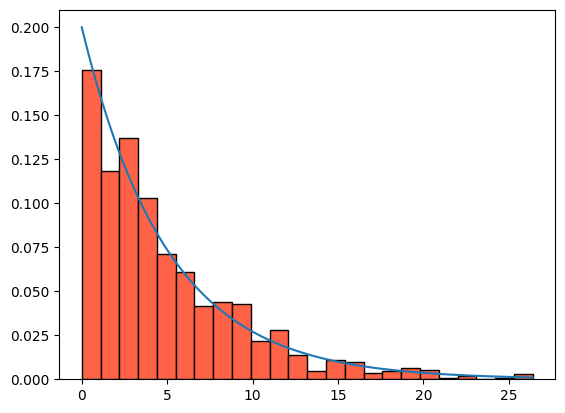

In [39]:
from mylib.radom_numbers import rand_expon as rexp

def display_exp_hist(tau,N):
  rand_expon_numbers = rexp(tau,N)
  X = np.linspace(min(rand_expon_numbers),max(rand_expon_numbers),100)
  plt.hist(rand_expon_numbers, bins=sturges(N), density=True, edgecolor='black', color='tomato')
  plt.plot(X,sc.expon.pdf(X, scale=tau))
  plt.show()

display_exp_hist(5,1000)

## Exercise 9.3
Write a program that plots the exponential probability distribution with a fixed parameter t0.

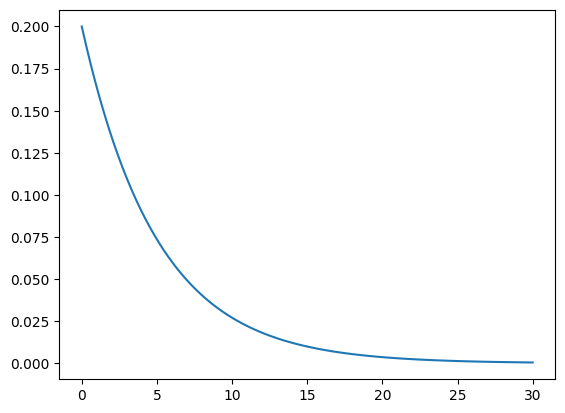

In [40]:
t0 = 5
X = np.linspace(0,t0*6,100)
Y = sc.expon.pdf(X,scale=t0)
plt.plot(X,Y)
plt.show()


## Exercise 9.4
Write a function likelihood that calculates the likelihood as the parameter t0 varies, for a sample of pseudo-random events generated according to the instructions of Exercise 1.

How does the result depend on the number of events in the sample?

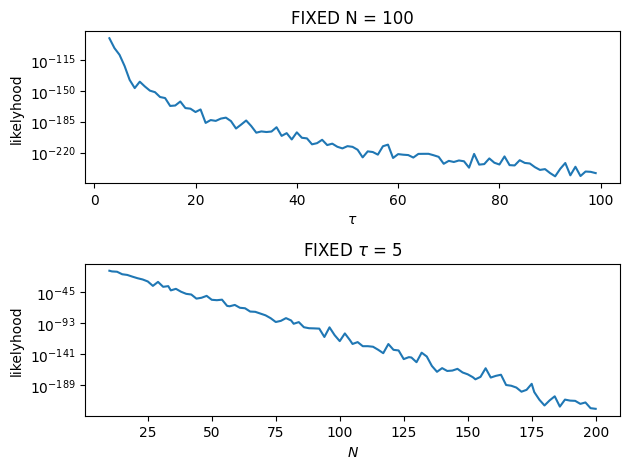

In [75]:
def likelyhood(f,X,tau):
  return np.prod(f(X,tau))

def exponential_pdf(X,tau):
  return sc.expon.pdf(X,scale=tau)

fig, ax = plt.subplots(nrows = 2, ncols = 1)

# FIXEX N
N = 100
lkh = []
t0s = range(3,100)
for t0 in t0s:
  X = rexp(t0,N)
  lkh.append(likelyhood(exponential_pdf,X,t0))

ax[0].plot(t0s,lkh, label='N={N}')
ax[0].set_yscale('log')
ax[0].set_xlabel('$\\tau$')
ax[0].set_ylabel('likelyhood')
ax[0].set_title('FIXED N = 100')

# FIXED t0
t0 = 5
lkh = []
LENS = np.linspace(10,200,100,dtype=np.int32)
for N in LENS:
  X = rexp(t0,N)
  lkh.append(likelyhood(exponential_pdf,X,t0))

ax[1].plot(LENS,lkh)
ax[1].set_yscale('log')
ax[1].set_xlabel('$N$')
ax[1].set_ylabel('likelyhood')
ax[1].set_title('FIXED $\\tau$ = 5')

fig.tight_layout()
plt.show()

## Execise 9.4.1 _loglikelihood_


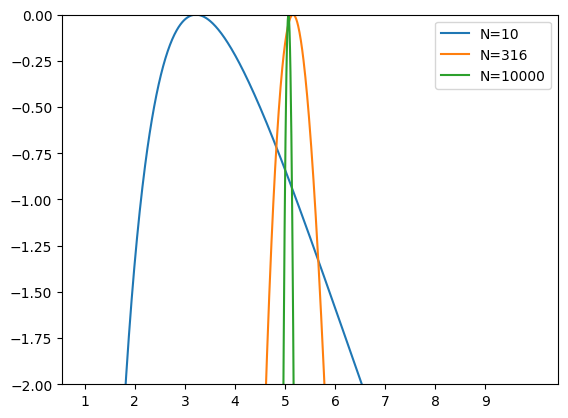

In [76]:
def loglikelyhood(f,X,tau):
  return np.sum(np.log(f(X,tau)))

def likelyhood(f,X,tau):
  return np.prod(f(X,tau))

def exponential_pdf(X,tau):
  return sc.expon.pdf(X,scale=tau)

mu = np.linspace(1,10,1000) # genero dei mu attorno ai quali testare la likelyhood

# N = np.linspace(50,150,3,dtype=np.int64)
N = np.logspace(1,4,3,dtype=np.int64)
# N = np.arange(10,15)
for i in N:
  X = expon_random(tau,i) # genero una collezione dati di i misurazioni
  L = np.array([loglikelyhood(exponential_pdf,X,t) for t in mu])
  max = np.max(L)
  L = L - max
  plt.plot(mu,L,label=f'N={i}')

plt.ylim(-2,0)
plt.xticks(np.arange(1,10))
plt.legend()
plt.show()

## Exercise 9.4

Write a function loglikelihood that calculates the logarithm of the likelihood as the parameter t0 varies, for a sample of pseudo-random events generated according to the instructions of Exercise 1. Remember that the logarithm of the likelihood is defined only when the likelihood is strictly positive.



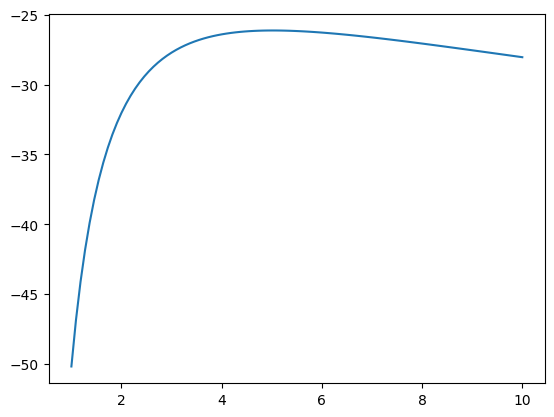

In [126]:
def loglikelyhood(f,X,tau):
  return np.sum(np.log(f(X,tau)))

tau = 5
X = expon_random(tau,10)
R = np.linspace(1,10,100)
L = np.array([loglikelyhood(exponential_pdf,X,t) for t in R])

plt.plot(R,L)
plt.show()

## Exercise 8.6
Study the behavior of the shape of the log-likelihood as a function of the number of events comprising the generated sample.

<ipython-input-70-dfa4b8285833>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  toys = np.array([expon_random(tau,i) for i in X])


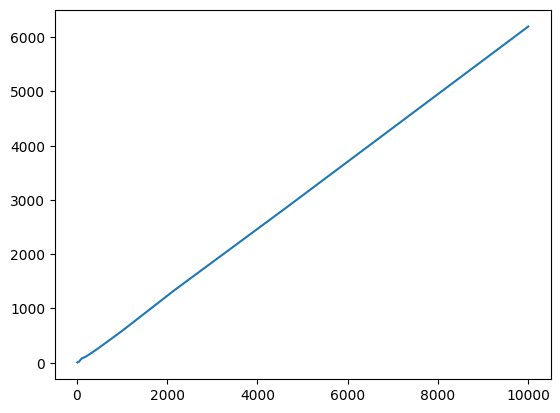

In [ ]:
tau = 0.2 # any tau is allowes, an higher tau shift over the line
X = np.logspace(1,4,10, dtype=np.int64)
toys = np.array([expon_random(tau,i) for i in X])
Y = np.array([loglikelyhood(exponential_pdf,i,tau) for i in toys])
plt.plot(X,Y)
plt.show()